In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('ggplot')
import seaborn as sns 
import os 
os.chdir('C:/Users/Administrator/Desktop/魔镜杯数据')
import warnings 
warnings.filterwarnings('ignore')

import lightgbm as lgb 
from lightgbm import plot_importance 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import score_card as sc

C:\Users\Administrator\Anaconda3\envs\py3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
C:\Users\Administrator\Anaconda3\envs\py3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df  = pd.read_csv('feature_select_data1.csv',encoding='gb18030')
df.head()

,UserInfo_1,UserInfo_3,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_15,WeblogInfo_16,...,_mobilephone,_qq,_realname,_turnover,update_time_cnt,update_all_cnt,log_cnt,log_timespan,avg_log_timespan,Idx
0,1.000,4.000,1.000,1.000,1.000,1.000,14.000,0.000,6.000,0.000,...,1.000,1.000,0.000,0.000,1.000,11.000,19.000,1.000,0.632,10001.000
1,1.000,4.000,0.000,1.000,1.000,1.000,14.000,0.000,0.000,7.000,...,2.000,1.000,1.000,0.000,3.000,21.000,24.000,1.000,10.375,10002.000
2,1.000,3.000,0.000,2.000,2.000,2.000,9.000,3.000,0.000,3.000,...,1.000,1.000,0.000,0.000,1.000,10.000,14.000,1.000,0.500,10003.000
3,4.000,1.000,nan,nan,nan,nan,2.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,1.000,10.000,7.000,5.000,0.000,10006.000
4,5.000,1.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,2.000,10.000,5.000,0.000,1.400,10007.000


# 两种版本的lgb默认参数模型

## sklearn版本

In [3]:
# 默认参数模型
x_train = df[df.sample_status=='train'].drop(['Idx','sample_status','target'],axis=1)
x_test = df[df.sample_status=='test'].drop(['Idx','sample_status','target'],axis=1)
y_train = df[df.sample_status=='train']['target']
y_test = df[df.sample_status=='test']['target']

In [4]:
import time
start = time.time()
lgb_sklearn = lgb.LGBMClassifier(random_state=0).fit(x_train,y_train)
end = time.time()
print('运行时间为{}秒'.format(round(end-start,0)))

运行时间为6.0秒


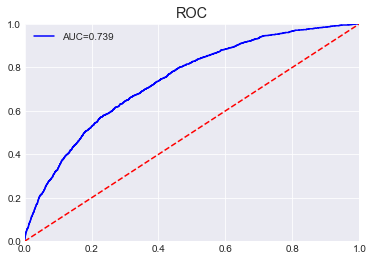

In [5]:
# 默认参数模型的AUC
lgb_sklearn_pre = lgb_sklearn.predict_proba(x_test)[:,1]
sc.plot_roc(y_test,lgb_sklearn_pre)

In [6]:
lgb_sklearn.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## 原生版本 

In [14]:
# 原生的lightgbm
lgb_train = lgb.Dataset(x_train,y_train)
lgb_test = lgb.Dataset(x_test,y_test,reference=lgb_train)
lgb_origi_params = {'boosting_type':'gbdt',
              'max_depth':-1,
              'num_leaves':31,
              'bagging_fraction':1.0,
              'feature_fraction':1.0,
              'learning_rate':0.1,
              'metric': 'auc'}
start = time.time()
lgb_origi = lgb.train(train_set=lgb_train,
                      early_stopping_rounds=10,
                      num_boost_round=400,
                      params=lgb_origi_params,
                      valid_sets=lgb_test)
end = time.time()
print('运行时间为{}秒'.format(round(end-start,0)))

[1]	valid_0's auc: 0.675718
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.683763
[3]	valid_0's auc: 0.689045
[4]	valid_0's auc: 0.688154
[5]	valid_0's auc: 0.692355
[6]	valid_0's auc: 0.692386
[7]	valid_0's auc: 0.697619
[8]	valid_0's auc: 0.699751
[9]	valid_0's auc: 0.70051
[10]	valid_0's auc: 0.702275
[11]	valid_0's auc: 0.706518
[12]	valid_0's auc: 0.70864
[13]	valid_0's auc: 0.713132
[14]	valid_0's auc: 0.715673
[15]	valid_0's auc: 0.717739
[16]	valid_0's auc: 0.719119
[17]	valid_0's auc: 0.72115
[18]	valid_0's auc: 0.723824
[19]	valid_0's auc: 0.724232
[20]	valid_0's auc: 0.726006
[21]	valid_0's auc: 0.726508
[22]	valid_0's auc: 0.726892
[23]	valid_0's auc: 0.727921
[24]	valid_0's auc: 0.729418
[25]	valid_0's auc: 0.73087
[26]	valid_0's auc: 0.732294
[27]	valid_0's auc: 0.7336
[28]	valid_0's auc: 0.734957
[29]	valid_0's auc: 0.736162
[30]	valid_0's auc: 0.737107
[31]	valid_0's auc: 0.736938
[32]	valid_0's auc: 0.73804
[33]	valid_0's auc: 0.7379

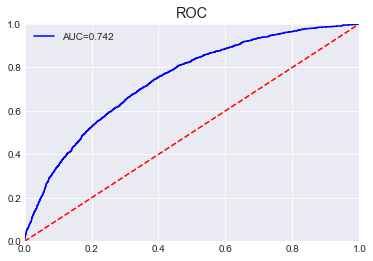

In [13]:
# 原生的lightgbm的AUC
lgb_origi_pre = lgb_origi.predict(x_test)
sc.plot_roc(y_test,lgb_origi_pre)

# 调参

In [18]:
# 确定最大迭代次数，学习率设为0.1 
base_parmas={'boosting_type':'gbdt',
             'learning_rate':0.1,
             'num_leaves':40,
             'max_depth':-1,
             'bagging_fraction':0.8,
             'feature_fraction':0.8,
             'lambda_l1':0,
             'lambda_l2':0,
             'min_data_in_leaf':20,
             'min_sum_hessian_inleaf':0.001,
             'metric':'auc'}
cv_result = lgb.cv(train_set=lgb_train,
                   num_boost_round=200,
                   early_stopping_rounds=5,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=base_parmas,
                   metrics='auc',
                   seed=0)

In [20]:
print('最大的迭代次数: {}'.format(len(cv_result['auc-mean'])))
print('交叉验证的AUC: {}'.format(max(cv_result['auc-mean'])))

最大的迭代次数: 51
交叉验证的AUC: 0.7271732572229754


In [24]:
# num_leaves ，步长设为5
param_find1 = {'num_leaves':range(30,60,5)}
cv_fold = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
start = time.time()
grid_search1 = GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,
                                                         n_estimators = 51,
                                                         max_depth=-1,
                                                         min_child_weight=0.001,
                                                         min_child_samples=20,
                                                         subsample=0.8,
                                                         colsample_bytree=0.8,
                                                         reg_lambda=0,
                                                         reg_alpha=0),
                             cv = cv_fold,
                             n_jobs=-1,
                             param_grid = param_find1,
                             scoring='roc_auc')
grid_search1.fit(x_train,y_train)
end = time.time()
print('运行时间为:{}'.format(round(end-start,0)))

运行时间为:109.0


In [29]:
print(grid_search1.grid_scores_)
print('\t')
print(grid_search1.best_params_)
print('\t')
print(grid_search1.best_score_)

[mean: 0.73008, std: 0.01408, params: {'num_leaves': 30}, mean: 0.72994, std: 0.01638, params: {'num_leaves': 35}, mean: 0.72868, std: 0.01652, params: {'num_leaves': 40}, mean: 0.72776, std: 0.01038, params: {'num_leaves': 45}, mean: 0.72917, std: 0.01601, params: {'num_leaves': 50}, mean: 0.72519, std: 0.01338, params: {'num_leaves': 55}]
	
{'num_leaves': 30}
	
0.7300782078536177


In [30]:
# num_leaves,步长设为2 
param_find2 = {'num_leaves':range(26,34,2)}
grid_search2 = GridSearchCV(estimator=lgb.LGBMClassifier(estimator=51,
                                                         learning_rate=0.1,
                                                         min_child_weight=0.001,
                                                         min_child_samples=20,
                                                         subsample=0.8,
                                                         colsample_bytree=0.8,
                                                         reg_lambda=0,
                                                         reg_alpha=0
                                                         ),
                            cv=cv_fold,
                            n_jobs=-1,
                            scoring='roc_auc',
                            param_grid = param_find2)
grid_search2.fit(x_train,y_train)
print(grid_search2.grid_scores_)
print('\t')
print(grid_search2.best_params_)
print('\t')
print(grid_search2.best_score_)

[mean: 0.73327, std: 0.01248, params: {'num_leaves': 26}, mean: 0.73188, std: 0.01426, params: {'num_leaves': 28}, mean: 0.73355, std: 0.01589, params: {'num_leaves': 30}, mean: 0.73318, std: 0.01272, params: {'num_leaves': 32}]
	
{'num_leaves': 30}
	
0.733552244998121


In [36]:
# 确定num_leaves 为30 ，下面进行min_child_samples 和 min_child_weight的调参，设定步长为5
param_find3 = {'min_child_samples':range(15,35,5),
               'min_child_weight':[x/1000 for x in range(1,4,1)]}
grid_search3 = GridSearchCV(estimator=lgb.LGBMClassifier(estimator=51,
                                                         learning_rate=0.1,
                                                         num_leaves=30,
                                                         subsample=0.8,
                                                         colsample_bytree=0.8,
                                                         reg_lambda=0,
                                                         reg_alpha=0
                                                         ),
                            cv=cv_fold,
                            scoring='roc_auc',
                            param_grid = param_find3,
                            n_jobs=-1)
start = time.time()
grid_search3.fit(x_train,y_train)
end = time.time()
print('运行时间:{} 秒'.format(round(end-start,0)))
print(grid_search3.grid_scores_)
print('\t')
print(grid_search3.best_params_)
print('\t')
print(grid_search3.best_score_)

运行时间:312.0 秒
[mean: 0.73155, std: 0.01112, params: {'min_child_samples': 15, 'min_child_weight': 0.001}, mean: 0.73155, std: 0.01112, params: {'min_child_samples': 15, 'min_child_weight': 0.002}, mean: 0.73155, std: 0.01112, params: {'min_child_samples': 15, 'min_child_weight': 0.003}, mean: 0.73355, std: 0.01589, params: {'min_child_samples': 20, 'min_child_weight': 0.001}, mean: 0.73355, std: 0.01589, params: {'min_child_samples': 20, 'min_child_weight': 0.002}, mean: 0.73355, std: 0.01589, params: {'min_child_samples': 20, 'min_child_weight': 0.003}, mean: 0.73206, std: 0.01434, params: {'min_child_samples': 25, 'min_child_weight': 0.001}, mean: 0.73206, std: 0.01434, params: {'min_child_samples': 25, 'min_child_weight': 0.002}, mean: 0.73206, std: 0.01434, params: {'min_child_samples': 25, 'min_child_weight': 0.003}, mean: 0.73210, std: 0.01145, params: {'min_child_samples': 30, 'min_child_weight': 0.001}, mean: 0.73210, std: 0.01145, params: {'min_child_samples': 30, 'min_child_we

In [37]:
# 确定min_child_weight为0.001，min_child_samples为20,下面对subsample和colsample_bytree进行调参
param_find4 = {'subsample':[x/10 for x in range(5,11,1)],
               'colsample_bytree':[x/10 for x in range(5,11,1)]}
grid_search4 = GridSearchCV(estimator=lgb.LGBMClassifier(estimator=51,
                                                         learning_rate=0.1,
                                                         min_child_samples=20,
                                                         min_child_weight=0.001,
                                                         num_leaves=30,
                                                         subsample=0.8,
                                                         colsample_bytree=0.8,
                                                         reg_lambda=0,
                                                         reg_alpha=0
                                                         ),
                            cv=cv_fold,
                            scoring='roc_auc',
                            param_grid = param_find4,
                            n_jobs=-1)
start = time.time()
grid_search4.fit(x_train,y_train)
end = time.time()
print('运行时间:{} 秒'.format(round(end-start,0)))
print(grid_search4.grid_scores_)
print('\t')
print(grid_search4.best_params_)
print('\t')
print(grid_search4.best_score_)

运行时间:826.0 秒
[mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 0.5}, mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 0.6}, mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 0.7}, mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 0.8}, mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 0.9}, mean: 0.73467, std: 0.01475, params: {'colsample_bytree': 0.5, 'subsample': 1.0}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 0.5}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 0.7}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 0.8}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 0.9}, mean: 0.73500, std: 0.01559, params: {'colsample_bytree': 0.6, 'subsample': 1.0}, me

In [39]:
param_find5 = {'reg_lambda':[0.001,0.01,0.03,0.08,0.1,0.3],
               'reg_alpha':[0.001,0.01,0.03,0.08,0.1,0.3]}
grid_search5 = GridSearchCV(estimator=lgb.LGBMClassifier(estimator=51,
                                                         learning_rate=0.1,
                                                         min_child_samples=20,
                                                         min_child_weight=0.001,
                                                         num_leaves=30,
                                                         subsample=0.5,
                                                         colsample_bytree=0.6,
                                                         ),
                            cv=cv_fold,
                            scoring='roc_auc',
                            param_grid = param_find5,
                            n_jobs=-1)
start = time.time()
grid_search5.fit(x_train,y_train)
end = time.time()
print('运行时间:{} 秒'.format(round(end-start,0)))
print(grid_search5.grid_scores_)
print('\t')
print(grid_search5.best_params_)
print('\t')
print(grid_search5.best_score_)

运行时间:692.0 秒
[mean: 0.73386, std: 0.01566, params: {'reg_alpha': 0.001, 'reg_lambda': 0.001}, mean: 0.73284, std: 0.01099, params: {'reg_alpha': 0.001, 'reg_lambda': 0.01}, mean: 0.73024, std: 0.01294, params: {'reg_alpha': 0.001, 'reg_lambda': 0.03}, mean: 0.73565, std: 0.01237, params: {'reg_alpha': 0.001, 'reg_lambda': 0.08}, mean: 0.73300, std: 0.01580, params: {'reg_alpha': 0.001, 'reg_lambda': 0.1}, mean: 0.73713, std: 0.01489, params: {'reg_alpha': 0.001, 'reg_lambda': 0.3}, mean: 0.73173, std: 0.01727, params: {'reg_alpha': 0.01, 'reg_lambda': 0.001}, mean: 0.73586, std: 0.01282, params: {'reg_alpha': 0.01, 'reg_lambda': 0.01}, mean: 0.73424, std: 0.01136, params: {'reg_alpha': 0.01, 'reg_lambda': 0.03}, mean: 0.73601, std: 0.01579, params: {'reg_alpha': 0.01, 'reg_lambda': 0.08}, mean: 0.73688, std: 0.01218, params: {'reg_alpha': 0.01, 'reg_lambda': 0.1}, mean: 0.73459, std: 0.01598, params: {'reg_alpha': 0.01, 'reg_lambda': 0.3}, mean: 0.73395, std: 0.01492, params: {'reg_alp

In [44]:
# 将最佳参数再次带入cv函数，设定学习率为0.005
best_params = {
    'boosting_type':'gbdt',
    'learning_rate':0.005,
    'num_leaves':30,
    'max_depth':-1,
    'bagging_fraction':0.5,
    'feature_fraction':0.6,
    'min_data_in_leaf':20,
    'min_sum_hessian_in_leaf':0.001,
    'lambda_l1':0.3,
    'lambda_l2':0.03,
    'metric':'auc'
}

best_cv = lgb.cv(train_set=lgb_train,
                 early_stopping_rounds=5,
                 num_boost_round=2000,
                 nfold=5,
                 params=best_params,
                 metrics='auc',
                 stratified=True,
                 shuffle=True,
                 seed=0)

In [50]:
print('最佳参数的迭代次数: {}'.format(len(best_cv['auc-mean'])))
print('交叉验证的AUC: {}'.format(max(best_cv['auc-mean'])))

最佳参数的迭代次数: 889
交叉验证的AUC: 0.7357671213094057


In [61]:
lgb_single_model = lgb.LGBMClassifier(n_estimators=900,
                                learning_rate=0.005,
                                min_child_weight=0.001,
                                min_child_samples = 20,
                                subsample=0.5,
                                colsample_bytree=0.6,
                                num_leaves=30,
                                max_depth=-1,
                                reg_lambda=0.03,
                                reg_alpha=0.3,
                                random_state=0)
lgb_single_model.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        importance_type='split', learning_rate=0.005, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=900, n_jobs=-1, num_leaves=30, objective=None,
        random_state=0, reg_alpha=0.3, reg_lambda=0.03, silent=True,
        subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

lightgbm单模型的AUC：0.7535371506640257


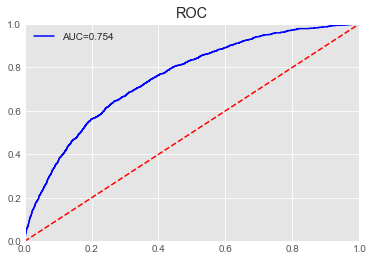

In [64]:
pre = lgb_single_model.predict_proba(x_test)[:,1]
print('lightgbm单模型的AUC：{}'.format(metrics.roc_auc_score(y_test,pre)))
sc.plot_roc(y_test,pre)